In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [2]:
# !wget http://www.timeseriesclassification.com/Downloads/ECG5000.zip
# !unzip ECG5000.zip

In [3]:
# !ls -alrt

In [4]:
# !cat ECG5000_TRAIN.txt ECG5000_TEST.txt > ecg_final.txt

In [5]:
# !head ecg_final.txt

In [ ]:
df1=pd.read_csv('ECG5000/ECG5000_TRAIN.txt', sep='  ', header=None)

In [15]:
df2=pd.read_csv('ECG5000/ECG5000_TEST.txt', sep='  ', header=None)

C:\Users\divijbajaj\AppData\Local\Temp\ipykernel_17164\193122105.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2=pd.read_csv('ECG5000/ECG5000_TEST.txt', sep='  ', header=None)


In [16]:
df1.shape

(500, 141)

In [17]:
df2.shape

(4500, 141)

In [18]:
df= pd.concat([df1,df2])

In [19]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [20]:
df = df.add_prefix('c')

In [21]:
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [22]:
df['c0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [25]:
df

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,4.0,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4496,2.0,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932
4497,2.0,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.622720,-2.044092,-1.295874,...,-0.896575,-1.512234,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531
4498,2.0,-1.124432,-1.905039,-2.192707,-2.904320,-2.900722,-2.761252,-2.569705,-2.043893,-1.490538,...,-2.495989,-2.821782,-3.268355,-3.634981,-3.168765,-2.245878,-1.262260,-0.443307,-0.559769,0.108568


In [26]:
df.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,...,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,...,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,...,-0.655753,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692
50%,1.000000,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588
75%,2.000000,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,...,1.062134,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012
max,5.000000,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


In [27]:
train_data, test_data, train_labels, test_labels = train_test_split(df.values, df.values[:,0:1], test_size=0.2, random_state=111)

In [28]:
train_data.shape

(4000, 141)

In [29]:
train_labels.shape

(4000, 1)

In [30]:
test_data.shape

(1000, 141)

In [31]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)

In [32]:
train_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)

In [33]:
train_data_scaled

array([[0.        , 0.50002524, 0.42299659, ..., 0.61680162, 0.58388556,
        0.3649298 ],
       [0.        , 0.48602565, 0.31200637, ..., 0.60438613, 0.6676527 ,
        0.40538671],
       [0.        , 0.6760041 , 0.6161329 , ..., 0.73484988, 0.64562905,
        0.43438114],
       ...,
       [0.25      , 0.70698484, 0.7982501 , ..., 0.23053824, 0.31421167,
        0.37774737],
       [0.        , 0.46498254, 0.25827775, ..., 0.6340938 , 0.66453824,
        0.47717869],
       [0.25      , 0.69314707, 0.79831145, ..., 0.68561341, 0.61110713,
        0.53512758]])

In [34]:
train_data_scaled.shape

(4000, 141)

In [35]:
normal_train_data= pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [36]:
normal_test_data= pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [37]:
print(normal_train_data.shape)
print(normal_test_data.shape)

## removed the label column from this therefore the size is 140 now

(2356, 140)
(563, 140)


In [38]:
normal_train_data

array([[0.50002524, 0.42299659, 0.16544622, ..., 0.61680162, 0.58388556,
        0.3649298 ],
       [0.48602565, 0.31200637, 0.10347709, ..., 0.60438613, 0.6676527 ,
        0.40538671],
       [0.6760041 , 0.6161329 , 0.32423629, ..., 0.73484988, 0.64562905,
        0.43438114],
       ...,
       [0.51303393, 0.49534486, 0.31569843, ..., 0.47879651, 0.40675918,
        0.2476885 ],
       [0.49088652, 0.40692249, 0.14274878, ..., 0.72286203, 0.69369144,
        0.51414093],
       [0.46498254, 0.25827775, 0.07491123, ..., 0.6340938 , 0.66453824,
        0.47717869]])

In [39]:
print(anomaly_train_data.shape)
print(anomaly_test_data.shape)

(1644, 140)
(437, 140)


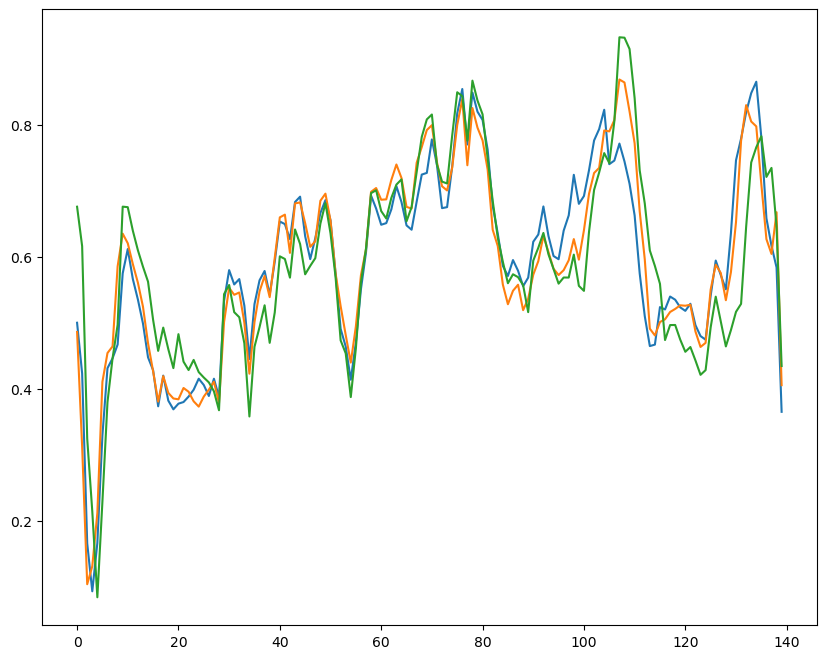

In [40]:
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data[2])

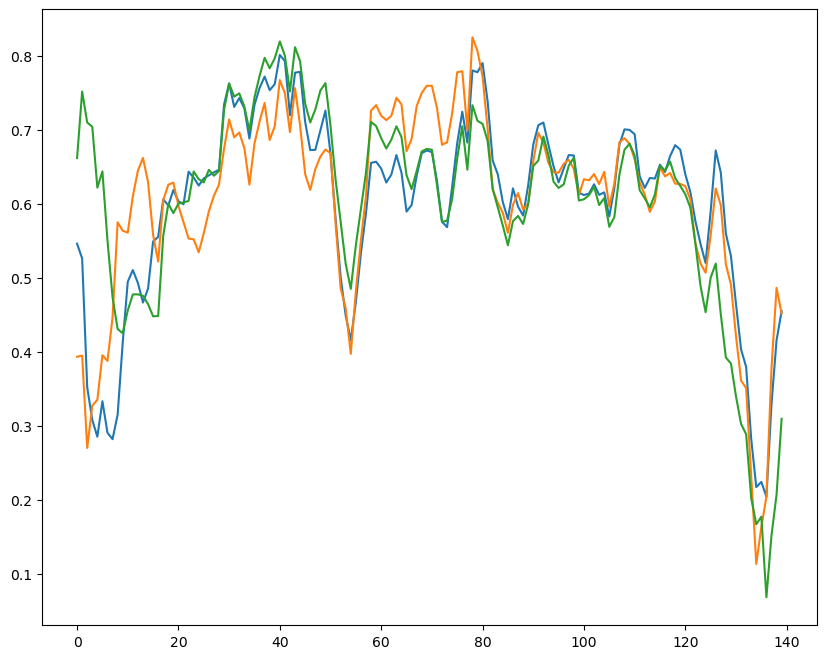

In [41]:
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data[2])

In [42]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu')) 
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(140, activation='sigmoid'))

In [43]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [44]:
model= AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(optimizer='adam', loss='mae')

In [45]:
history = model.fit(normal_train_data, normal_train_data, 
          epochs=50, 
          batch_size=128,
          validation_data=(train_data_scaled[:,1:], train_data_scaled[:,1:]),
          shuffle=True,
          callbacks=[early_stopping])

Epoch 1/50
19/19 [==============================] - 2s 23ms/step - loss: 0.1329 - val_loss: 0.1206
Epoch 2/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0912 - val_loss: 0.0879
Epoch 3/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0599 - val_loss: 0.0786
Epoch 4/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0498 - val_loss: 0.0762
Epoch 5/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0481 - val_loss: 0.0757
Epoch 6/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0477 - val_loss: 0.0752
Epoch 7/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0475 - val_loss: 0.0744
Epoch 8/50
19/19 [==============================] - 0s 8ms/step - loss: 0.0473 - val_loss: 0.0737
Epoch 9/50
19/19 [==============================] - 0s 9ms/step - loss: 0.0472 - val_loss: 0.0736
Epoch 10/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0470 - val_loss: 0.0731
Epoch 11/50
19/19

In [46]:
encoder_out = model.encoder(normal_test_data).numpy()
decoder_out = model.decoder(encoder_out).numpy()

In [47]:
encoder_out.shape

(563, 8)

In [48]:
decoder_out.shape

(563, 140)

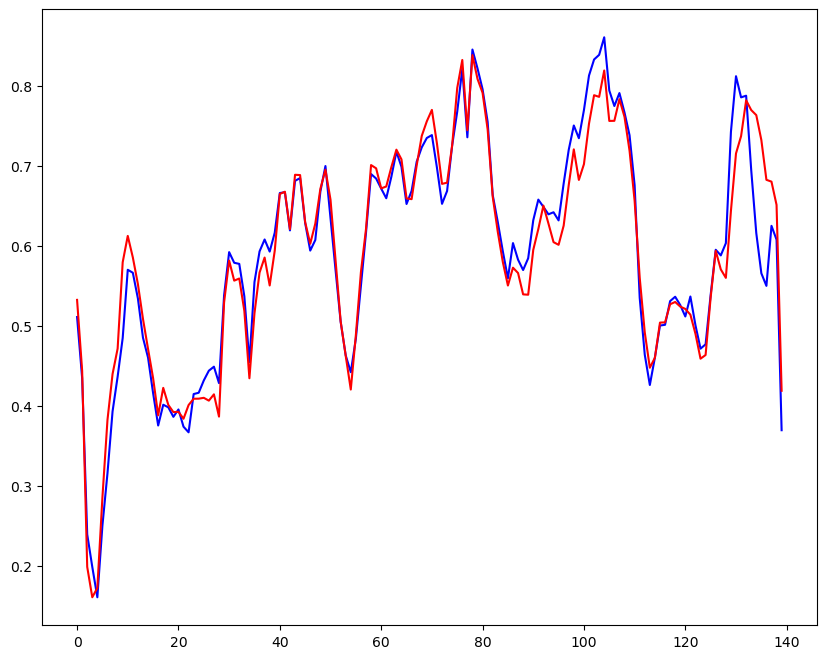

In [49]:
plt.plot(normal_test_data[0],'b')
plt.plot(decoder_out[0],'r')

In [50]:
encoder_out_a = model.encoder(anomaly_test_data).numpy()
decoder_out_a = model.decoder(encoder_out_a).numpy()

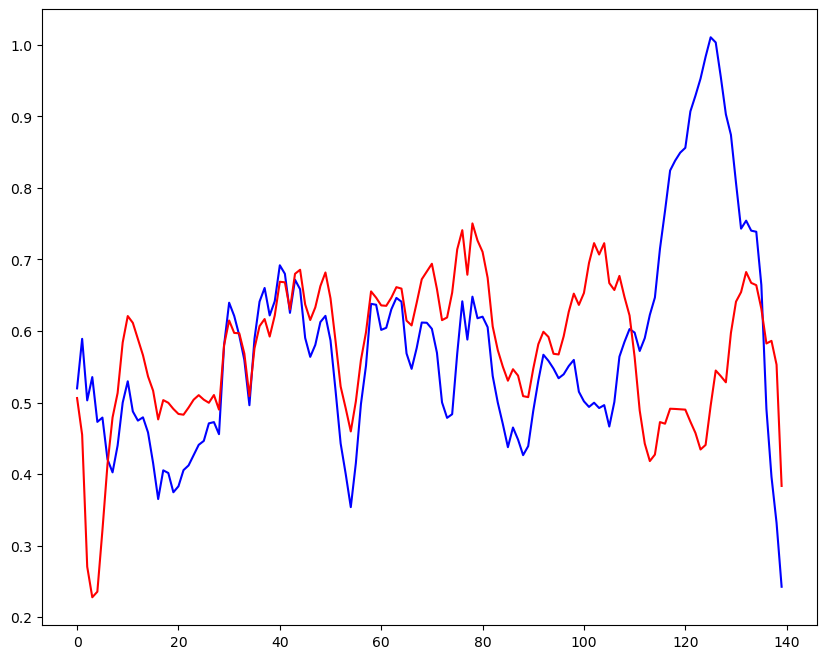

In [51]:
plt.plot(anomaly_test_data[0],'b')
plt.plot(decoder_out_a[0],'r')

18/18 [==============================] - 0s 2ms/step


(array([ 6.,  5., 28., 27., 34., 34., 41., 42., 38., 34., 29., 23., 28.,
        17., 14., 17., 24., 14.,  7.,  8., 11.,  8., 13.,  9.,  8.,  1.,
         3.,  7.,  3.,  3.,  1.,  6.,  2.,  1.,  1.,  2.,  1.,  0.,  2.,
         2.,  3.,  0.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  2.]),
 array([0.01170846, 0.01362505, 0.01554164, 0.01745824, 0.01937483,
        0.02129142, 0.02320801, 0.0251246 , 0.02704119, 0.02895778,
        0.03087437, 0.03279096, 0.03470755, 0.03662414, 0.03854073,
        0.04045732, 0.04237391, 0.0442905 , 0.04620709, 0.04812369,
        0.05004028, 0.05195687, 0.05387346, 0.05579005, 0.05770664,
        0.05962323, 0.06153982, 0.06345641, 0.065373  , 0.06728959,
        0.06920618, 0.07112277, 0.07303936, 0.07495595, 0.07687254,
        0.07878914, 0.08070573, 0.08262232, 0.08453891, 0.0864555 ,
        0.08837209, 0.09028868, 0.09220527, 0.09412186, 0.09603845,
        0.09795504, 0.09987163, 0.10178822, 0.10370481, 0.1056214 ,
        0.10753799]),
 <BarContainer

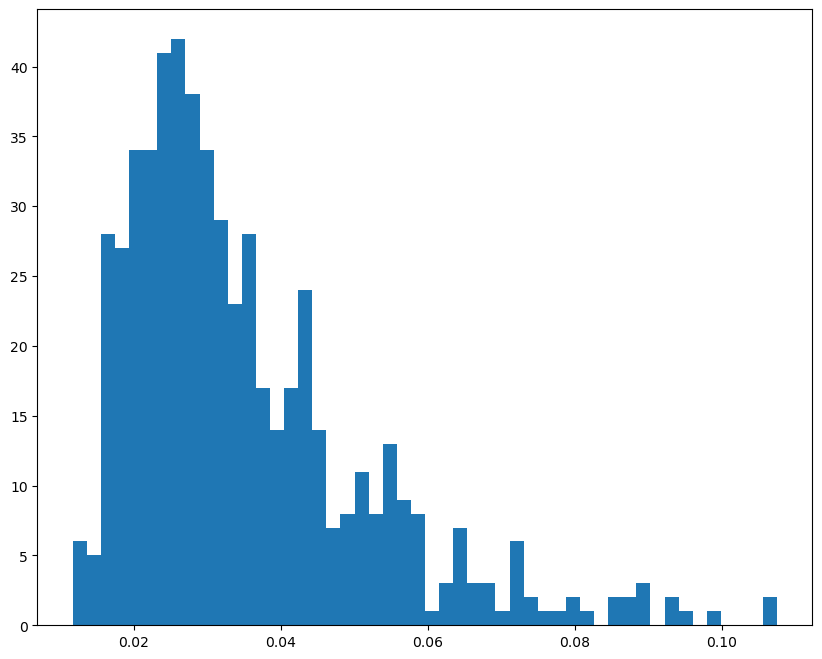

In [52]:
reconstructions = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data)

plt.hist(train_loss, bins=50)

In [53]:
np.mean(train_loss) 

0.03504957000148525

In [54]:
np.std(train_loss)

0.016534102240013664

In [55]:
threshold = np.mean(train_loss) + 2*np.std(train_loss)

In [56]:
threshold

0.06811777448151257

14/14 [==============================] - 0s 2ms/step


(array([ 1.,  0.,  0.,  0.,  1.,  1.,  1.,  3.,  1.,  4.,  4., 13., 14.,
        30., 28., 50., 55., 42., 51., 36., 41., 15., 15., 11.,  3.,  1.,
         0.,  1.,  3.,  1.,  1.,  1.,  0.,  1.,  2.,  2.,  1.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.04614252, 0.04918988, 0.05223724, 0.0552846 , 0.05833196,
        0.06137931, 0.06442667, 0.06747403, 0.07052139, 0.07356875,
        0.07661611, 0.07966347, 0.08271082, 0.08575818, 0.08880554,
        0.0918529 , 0.09490026, 0.09794762, 0.10099498, 0.10404234,
        0.10708969, 0.11013705, 0.11318441, 0.11623177, 0.11927913,
        0.12232649, 0.12537385, 0.12842121, 0.13146856, 0.13451592,
        0.13756328, 0.14061064, 0.143658  , 0.14670536, 0.14975272,
        0.15280007, 0.15584743, 0.15889479, 0.16194215, 0.16498951,
        0.16803687, 0.17108423, 0.17413159, 0.17717894, 0.1802263 ,
        0.18327366, 0.18632102, 0.18936838, 0.19241574, 0.1954631 ,
        0.19851046]),
 <BarContainer

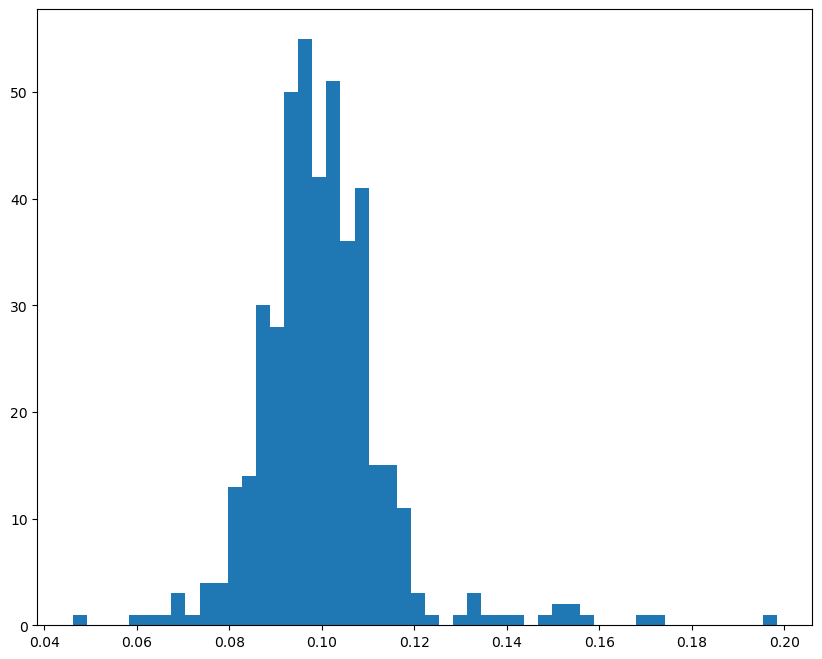

In [57]:
reconstructions_a = model.predict(anomaly_test_data)
train_loss_a = tf.keras.losses.mae(reconstructions_a, anomaly_test_data)

plt.hist(train_loss_a, bins=50)

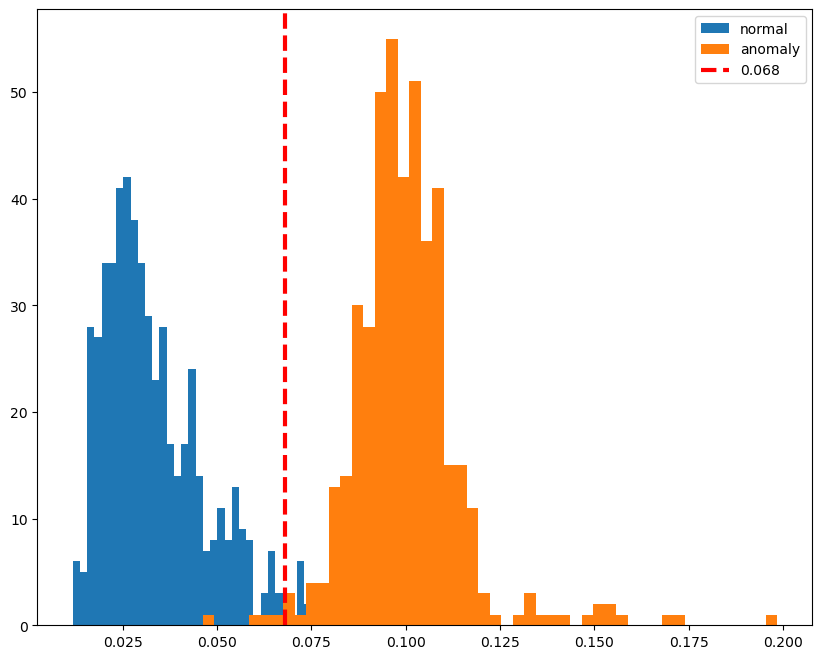

In [58]:
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_a, bins=50, label='anomaly')
plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

In [59]:
np.mean(train_loss_a) 

0.09997406853913439

In [60]:
np.std(train_loss_a) 

0.014627125090216825

In [61]:
tf.math.less(train_loss, threshold)

<tf.Tensor: shape=(563,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

In [62]:
preds = tf.math.less(train_loss, threshold)

In [63]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=535>

In [64]:
preds.shape

TensorShape([563])

In [65]:
preds_a = tf.math.greater(train_loss_a, threshold)

In [66]:
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=433>

In [67]:
preds_a.shape

TensorShape([437])